# Graph Theory

We have actually already encountered networks and graphs, when we covered Laplacian Eigenmaps in the dimension reduction module.  A network (a.k.a. graph) consists of vertices, edges, and weights, $G(V,E,W)$.  Graph theory is the mathematical field that provides the tools to understand and analyze networks.   We will learn about a tool called NetworkX, https://networkx.github.io/, which is the de facto  Python package for creating, manipulating, and studying the structure, dynamics, and functions of complex networks. Lets begin by creating a simple undirected graph and viewing it.

In [5]:
import networkx as nx
import numpy as np

G = nx.Graph()  # Create an empty graph with no nodes or edges

# add nodes one at a time
G.add_node('A')

# or add a list of nodes
G.add_nodes_from(['B', 'C', 'D'])

# add edge one at a time
G.add_edge('A', 'C')

# or add a list of edges
G.add_edges_from([('A', 'B'), ('A','D'), ('C', 'D')])

# thus far we have created an undirected, unweighted graph.
# We can retreive the number of edges and number of nodes using:
print "number of nodes: ", G.number_of_nodes()

print "number of edges: ", G.number_of_edges()

number of nodes:  4
number of edges:  4


NetworkX was not designed to be a graph drawing package, but some functionality is provided.

In [2]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True, font_weight='bold')

There are some basic reporting functions.

In [ ]:
# report list of nodes
list(G.nodes)

In [ ]:
# report list of edges
list(G.edges)

the degree of a node is the number of edges that connect to it, (or as we will see later for weighted graphs, the sum of the weights connected to it).

In [ ]:
# report degree of node connected to "C"
G.degree('C')

In [ ]:
# can list all neighbors of a node
list(G.neighbors('C'))

In [ ]:
# or you can also use the terminology "adjacency" to describe neighbors
list(G.adj['C'])

In [ ]:
# One can also remove nodes and edges in a similar fashion
G.remove_node('C')

nx.draw(G, with_labels=True, font_weight='bold')

In [ ]:
# we can also define a graph with weighted edges.

# clear existing graph
G.clear()

# add graph with four nodes
G.add_nodes_from(['A','B', 'C', 'D'])

# add weighted edges 
G.add_weighted_edges_from([('A', 'B',2.5), ('A','D',0.5), ('C', 'D',2.0), ('A','C',1.0)])

# plot
nx.draw(G, with_labels=True, font_weight='bold')



To define a directed graph (which is useful for say, traffic flow), the DiGraph class provides additional properties specific to directed graphs.  Specifically, nodes have *two* different degre measures:
- an in-degree, which measures the number of incoming edges
- an out-degree, which measures the number of out-going edges.  

In [ ]:
DG = nx.DiGraph()
DG.add_nodes_from([1,2, 3,4]) # note: nodes can be any hashable object

# add weighted edges 
DG.add_weighted_edges_from([(1, 2, 2.5), (1,4,0.5), (3, 4,2.0), (1,3,1.0)])

# plot
nx.draw(DG, with_labels=True, font_weight='bold')


In [ ]:
DG.out_degree(3, weight='weight')

In [ ]:
DG.in_degree(3, weight='weight')

In [ ]:
# note that degree will still work, but will report the sum of the in and out degree
DG.degree(3, weight='weight')

In [ ]:
# or if you just want to count the edges
DG.degree(3, weight=1)

## Path between nodes

Another basic definition we need in a graph, is the notion of a path between two nodes, i.e., the set of edges one traverses to go from one node to another.  In many applications, one cares about the shortest permitted path between two nodes (sum of the weights of the edges connecting the two nodes).

## Connected / Disconnected graphs

Before we introduce the concept of connectivity, we need to define connected and disconnected graphs.  
- A graph is *connected* when there is a path between every pair of vertices. In a connected graph, there is no unreachable vertex. 
- A graph that is not connected is *disconnected*. A graph G is said to be disconnected if there exist two nodes in G such that no path in G has those nodes as endpoints.

In [ ]:
# this is an example of a connected graph
G = nx.Graph()  
G.add_nodes_from(['A','B', 'C', 'D'])
G.add_edges_from([('A','C'),('A', 'B'), ('A','D'), ('C', 'D')])
nx.draw(G, with_labels=True, font_weight='bold')

In [ ]:
# this is an example of a disconnected graph
G = nx.Graph()  
G.add_nodes_from(['A','B', 'C', 'D'])
G.add_edges_from([('A', 'B'), ('C', 'D')])
nx.draw(G, with_labels=True, font_weight='bold')

A connected component is a maximal connected subgraph of G -- each vertex belongs to exactly one connected component, as does each edge.  The number of *connected components* is the number of subgraphs (subsets of nodes and edges linking those nodes) that are connected.  In the above example, there are two connected components

In [ ]:
print "# of connected components = ", nx.number_connected_components(G)

## Connectivity

Connectivity: the minimum number of elements (nodes or edges) that need to be removed to disconnect the remaining nodes from each other.  Some simple examples:

In [ ]:
# this graph becomes disconnected with the edge CD is removed.
G = nx.Graph()  
G.add_nodes_from(['A','B', 'C', 'D','E','F'])
G.add_edges_from([('A','B'),('A', 'C'), ('B','C'), ('C', 'D'),('D','E'),('D','F'),('E','F')])
nx.draw(G, with_labels=True, font_weight='bold')

In [ ]:
# this graph becomes disconnected with the node C
G = nx.Graph() 
G.add_nodes_from(['A','B', 'C', 'D','E'])
G.add_edges_from([('A','B'),('A', 'C'), ('B','C'), ('C', 'D'),('C','E'),('D','E')])
nx.draw(G, with_labels=True, font_weight='bold')

A (vertex) *cut* is defined as a set of vertices whose removal renders the graph disconnected.  In the above example, this is the vertex C.  Since this set only has one element, we say that the graph G has connectivity 1, the size of the minimal vertex cut.  If the set has $k$ elements, we say that the graph G has connectivity $k$.   A graph is called *k-connected* if its vertex connectivity is $k$ or greater.

In [ ]:
dG = nx.DiGraph()
dG.add_edge('x','a', capacity = 3.0)
dG.add_edge('x','b', capacity = 1.0)
dG.add_edge('a','c', capacity = 3.0)
dG.add_edge('b','c', capacity = 5.0)
dG.add_edge('b','d', capacity = 4.0)
dG.add_edge('d','e', capacity = 2.0)
dG.add_edge('c','y', capacity = 2.0)
dG.add_edge('e','y', capacity = 3.0)
nx.draw(dG, with_labels=True, font_weight='bold')
cut_value, partition = nx.minimum_cut(dG,'x','y')
print(cut_value)
print(partition)

Many of the graph seperators problems (identifying cuts) have been proven to be NP-hard.  There are a wealth of algorithms to estimate connectivity and identify cuts, but deterministic algorithms are computationally intractable for a large number of vertices.  One of the more promising algorithms I have seen was discussed in this manuscript, https://doi.org/10.1016/j.jocs.2016.10.005, where the algorithm could find 3-vertex seperators for 25k vertices.  The R scripts at https://github.com/sinkovit/k-components and are not implemented in Python yet.  This would make a good project for someone wanting to contribute a useful algorithm upstream to NetworkX.

## Centrality

The centrality of a vertex measures the relative importance of the vertex within the graph.  This concept was first developed in social network analysis, hence, many of the terms and concepts reflect the sociological origin.  In social network analysis, one often seeks to identify the most influential people, the most informed people, or the most communicative people.  Indeed, there are various popular measures for centrality based on the application/question.  Unfortunately, a choice that is optimal for one application is often sub-optimal for a different application.  

### Degree centrality

The simplest measure is degree centrality, which is defined as the number of edges connected to a node.  This was historically the first measure proposed, and is understood in terms of the capacity coming in to the node (indegree) and leaving the node (outdegree).  To compare between graphs, one often scales the degree by $(N-1)$, where $N$ is the number of vertices in the graph.  Computing degree centrality takes O(N^2) operations.

### Closeness centrality

Closeness centrality measures the average length of the shortest path between the node and all other nodes in the graph.  The closeness was defined by Bavelas (1950, "Communication Patterns in task-Oriented Groups") as
\begin{align}
C(x) = \frac{1}{\sum_y d(y,x)}
\end{align}
There are several algorithm choices for finding the shortest path.  For dense graphs, this typically takes $O(N^3)$ operations.  By construction, it only makes sense to talk about closeness centrality when you have a connected graph.

### Betweenness centrality

This measure of centrality quantifies the number of times a node acts as a bridge along the shortest path between other nodes.  It was introduced by Freeman (1977, "A set of measures of centrality based upon betweenness" as a measure for quantifying the control of a human on the communication between other humans in a social network.  The betweenness of a vertex $v$ is computed as follows
- for each pair of vertices $(s,t)$, compute the shortest path between them
- for each pair of vertices $(s,t)$, determine the fraction of paths that pass through vertex $v$
- sum this fraction over all pairs of vertices $(s,t)$.

Like the closeness centrality, betweenness centrality typically takes $O(N^3)$ operations.  Again by construction, it only makes sense to talk about closeness centrality when you have a connected graph.

### Eigenvector centrality

Eigenvector centrality is a natural extension of degree centrality. The idea is to define a relative score for a vertex based on the quality connections: connections from high centrality nodes contribute more to the score of a node than connections from a low centrality score.  Google's PageRank was a variant of this idea.  It is called the eigenvector centrality because it can be posed as an eigenvalue problem.

Let $A$ be the adjacency matrix for a graph $G$, i,e, $A_{ij} = 1$ if there is an edge connecting vertex $i$ and $j$, 0 otherwise.  We want the centrality score for node $i$, denote this as $x_i$, to be proportional to the sum of the scores of all the nodes that are connected to it, i.e.
\begin{align*}
  x_i = c \sum_{j \in M(i)} x_j
\end{align*}
where $M(i)$ are nodes in the neighborhood (i.e. connected) to node $i$.  Here, $c$ is a constant.  We can simplify this sum by using the adjacency matrix
\begin{align*}
  x_i = c \sum_{j=1}^N A_{ij} x_j
\end{align*}
A vector of centrality scores, $\vec{x}$, thus satisfies
\begin{align*}
  \vec{x} = c A \vec{x}.
\end{align*}
If we take $c = \frac{1}{\lambda}$, and rearrange, we recover the standard eigenvalue problem:
\begin{align*}
A \vec{x} = \lambda \vec{x}
\end{align*}
We desire centrality measures, $\vec{x}$, that are non-negative.  There is a mathematical theorem (the Perron-Frobenius theorem) that asserts that the eigenvector associated with the largest eigenvalue results in the desired centrality measure.


### Example

Lets explore centrality measures on a toy graph

In [ ]:
G = nx.Graph()  
G.add_nodes_from(['A','B', 'C', 'D','E','F'])
G.add_edges_from([('A','B'),('A', 'C'), ('B','C'), ('C', 'D'),('D','E'),('D','F'),('E','F')])
nx.draw(G, with_labels=True, font_weight='bold')

deg_cent = nx.degree_centrality(G)
print "degree centrality: ", deg_cent

betw_cent = nx.betweenness_centrality(G)
print "betweenness  centrality: ", betw_cent

close_cent = nx.closeness_centrality(G)
print "closeness  centrality: ", close_cent

eig_cent = nx.eigenvector_centrality(G)
print "eigenvector  centrality: ", eig_cent


## Facebook Example

Okay, lets now use NetworkX to study part of the Facebook dataset from the Stanford Large Network Dataset Collection, which is an undirected graph consisting of node features (profiles), circles, and ego networks, https://snap.stanford.edu/data/ego-Facebook.html.  The datafile below contains on each line, an edge definition connecting two nodes.

In [3]:
fb = nx.Graph() 
fb = nx.read_edgelist("data/facebook_data.txt")
print "number of nodes: ", fb.number_of_nodes()
print "number of edges: ", fb.number_of_edges()

number of nodes:  4039
number of edges:  88234


So, this data set has 4,039 users and 88,234 friendship connections, so each user has (on average) 21 friendship connections.  It is often useful to visualize a histogram of the degrees

In [ ]:
plt.hist(dict(fb.degree()).values(),100)
plt.ylabel("frequency")
_ = plt.xlabel("degree")

Because the degree distribution of this network follows a "power-law", one can refer to this as a *scale-free* network.  

In [ ]:
plt.hist(dict(fb.degree()).values(),100)
plt.ylabel("frequency")
plt.xlabel("degree")
_ = plt.yscale('log')

In [ ]:
# We can also measure the centrality distribution of nodes in the network.  
# First, we should make sure that we have a connected graph, i.e., only one connected component

print "# connected components = ", nx.number_connected_components(fb)
plt.subplot(2,1,1)
plt.hist(dict(nx.degree_centrality(fb)).values(),100)
plt.ylabel("frequency")
plt.yscale('log')
_ = plt.xlabel("degree centrality")

plt.subplot(2,1,2)
plt.hist(dict(nx.eigenvector_centrality(fb)).values(),100)
plt.ylabel("frequency")
plt.yscale('log')
_ = plt.xlabel("eigenvector centrality")

The other two centrality measures take too long to run for a demo.  Both graphs show, that a large majority of the nodes have low centrality.  We can try to trim the network, dropping nodes that have less than the average degree of the network.  

In [ ]:
def trim_degree_centrality(graph, degree = 0.01):
    g = graph.copy()
    d = nx.degree_centrality(g)
    for n in graph.nodes():
    #    print(d[n])
        if d[n] <= degree:
            g.remove_node(n)
    return g

threshold = 21.0/(fb.number_of_nodes() - 1)
trim_fb = trim_degree_centrality(fb, degree = threshold)

In [ ]:
print "number of nodes: ", trim_fb.number_of_nodes()
print "number of edges: ", trim_fb.number_of_edges()

We have successfully removed half the nodes. Lets see if we can now plot the various centrality measures...
First, we should check if the graph is still connected for some o the centrality measures to make sense.

In [ ]:
print "# connected components = ", nx.number_connected_components(trim_fb)

oops.  looks like we now have a disconnected graph.  lets look at the subgraphs and pick an appropriate one to study

In [ ]:
fb_subgraph = list(nx.connected_component_subgraphs(trim_fb))

# check number of components of each subgraph
print "nodes in subgraph [0]: ", len(fb_subgraph[0])
print "nodes in subgraph [1]: ", len(fb_subgraph[1])

Guess only one node was disconnected.  lets measure the centrality distribution of the larger subgraph.

In [ ]:
# We can also measure the centrality distribution of nodes in the network
plt.subplot(2,2,1)
plt.hist(dict(nx.degree_centrality(fb_subgraph[0])).values(),100)
plt.ylabel("frequency")
plt.yscale('log')
_ = plt.xlabel("degree centrality")

plt.subplot(2,2,2)
plt.hist(dict(nx.closeness_centrality(fb_subgraph[0])).values(),100)
plt.ylabel("frequency")
plt.yscale('log')
_ = plt.xlabel("closeness centrality")

plt.subplot(2,2,3)
plt.hist(dict(nx.betweenness_centrality(fb_subgraph[0])).values(),100)
plt.ylabel("frequency")
plt.yscale('log')
_ = plt.xlabel("betweenness centrality")

plt.subplot(2,2,4)
plt.hist(dict(nx.eigenvector_centrality(fb_subgraph[0])).values(),100)
plt.ylabel("frequency")
plt.yscale('log')
_ = plt.xlabel("eigenvector centrality")

We are not going to get into parallel processing in this class, but the betweenness/closeness centrality measures are computational intensive, but conveniently, pleasantly parallel.  With a little bit of effort, one can use multiple threads to compute shortest paths using the multi-processing toolbox to accelerate the centrality computation:   https://networkx.github.io/documentation/networkx-1.9/examples/advanced/parallel_betweenness.html

## Graph Visualization

We can make use of centrality to aid the visualization of graphs.  Suppose we just used a random layout of nodes to visualize the graph

In [ ]:
fig = plt.figure(figsize = (6,6))

pos = nx.random_layout(fb)
nx.draw_networkx(fb, pos, with_labels = False)
_ = plt.axis('off') 

This doesn't provide any insight into the network.  if we pick the position of the vertices more intelligently, for example using the spring_layout functionality (the default in nx.draw), we start to gain more intuition about the network. 

In [ ]:
fig = plt.figure(figsize = (6,6))
nx.draw(fb)

The function nx.spring_layout returns the position of the nodes using the Fruchterman–Reingold force-directed algorithm. This algorithm distributes the graph nodes in such a way that all the edges are more or less equally long and they cross themselves as few times as possible. Moreover, we can change the size of the nodes to that defined by their degree centrality.  We recreate the plot, but this time, allowing the algorithm to iterate further than the default.  Then, we vary the size of the node to it's centrality measure.

(-1.1003177871880707,
 0.9828766289725959,
 -0.6439174907539388,
 0.7474366594139497)

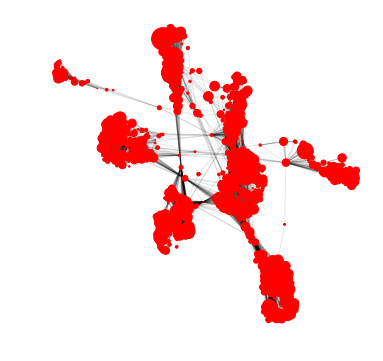

In [6]:
pos_fb = nx.spring_layout(fb)

fig = plt.figure(figsize = (6,6))
degree_cent_fb = nx.degree_centrality(fb)
nsize = np.array([v for v in degree_cent_fb.values()])
cte = 500
nsize = cte*(nsize  - min(nsize))/(max(nsize)-min(nsize))
nodes=nx.draw_networkx_nodes(fb, pos = pos_fb, node_size = nsize, with_labels = True)
edges=nx.draw_networkx_edges(fb, pos = pos_fb, alpha = .1, with_labels = True)
_ = plt.axis('off') 


The book shows various renditions of network visualization using different centrality measures to vary the size of the nodes (Figures 8.6 -- 8.9).  Additionally, figure 8.10 shows that rendition when page rank is used to determine the size of the node.  As mentioned earlier, the page rank algorithm is a variant of the eigenvector centrality measure.  The difference, is they generate a Markov transition matrix, $M$, to mimic a random walk through the network.  Applying this transition matrix iteratively results in a page rank vector, whose $i$-th entry corresponds to a web surfer visiting page $i$.  There is a built-in networkX command to compute the pagerank vector.

(-1.1008024306012165,
 0.9838535924857809,
 -0.6462221572573891,
 0.7471818214869226)

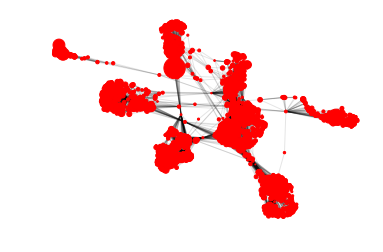

In [7]:
pr = nx.pagerank(fb, alpha=0.85)
nsize = np.array([v for v in pr.values()])
cte = 500
nsize = cte*(nsize  - min(nsize))/(max(nsize)-min(nsize))
nodes=nx.draw_networkx_nodes(fb, pos = pos_fb, node_size = nsize, with_labels = True)
edges=nx.draw_networkx_edges(fb, pos = pos_fb, alpha = .1, with_labels = True)
_ = plt.axis('off') 